In [213]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from datetime import datetime, timedelta
import requests
import warnings
warnings.filterwarnings('ignore')
import pytz
utc=pytz.UTC
from matplotlib.pyplot import figure
figure(figsize=(12, 9), dpi=80)


<Figure size 960x720 with 0 Axes>

<Figure size 960x720 with 0 Axes>

In [214]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [215]:
plt.style.use('seaborn-dark-palette')

In [216]:
dataset = pd.read_csv("dataset.csv")

In [217]:
dataset.drop(dataset[dataset['meter_id'] == 'meter_id'].index, inplace=True)

In [218]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset['voltage'] = dataset['voltage'].astype(float)
dataset['frequency'] = dataset['frequency'].astype(float)
dataset['energy'] = dataset['energy'].astype(float)/1000
dataset['reactive_power'] = dataset['reactive_power'].astype(float)
dataset['apparent_power'] = dataset['apparent_power'].astype(float)
dataset['power_factor'] = dataset['power_factor'].astype(float)
dataset['real_power'] = dataset['real_power'].astype(float)
dataset['current'] = dataset['current'].astype(float)

In [219]:
dataset.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
0,152267,OSU003,2021-08-17 20:38:31.521608,0.34,157.56,50.1,0.60,0.939209,32.14,42.86,53.57
1,152266,OSU003,2021-08-17 20:37:56.427867,0.33,158.82,50.0,0.62,0.939209,32.49,41.12,52.41
2,152265,OSU003,2021-08-17 20:36:00.484567,0.33,155.84,50.3,0.60,0.939208,30.86,41.14,51.43
3,152264,OSU003,2021-08-17 20:35:27.314771,0.33,152.76,50.4,0.62,0.939208,31.25,39.55,50.41
4,152263,OSU003,2021-08-17 20:34:12.651532,0.33,152.85,50.2,0.61,0.939207,30.77,39.97,50.44


In [220]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101400 entries, 0 to 101905
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              101400 non-null  object        
 1   meter_id        101384 non-null  object        
 2   timestamp       101400 non-null  datetime64[ns]
 3   current         101384 non-null  float64       
 4   voltage         101384 non-null  float64       
 5   frequency       101384 non-null  float64       
 6   power_factor    101384 non-null  float64       
 7   energy          101384 non-null  float64       
 8   real_power      101384 non-null  float64       
 9   reactive_power  101384 non-null  float64       
 10  apparent_power  101384 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 9.3+ MB


In [221]:
dataset = dataset.fillna(0)

In [222]:
dataset.groupby('meter_id').count()

,id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
meter_id,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16
ADA001,4,4,4,4,4,4,4,4,4,4
ADA002,1,1,1,1,1,1,1,1,1,1
ADA003,1,1,1,1,1,1,1,1,1,1
ADA004,1,1,1,1,1,1,1,1,1,1
ADA005,1,1,1,1,1,1,1,1,1,1
ADA007,1,1,1,1,1,1,1,1,1,1
ADA008,1,1,1,1,1,1,1,1,1,1
ADA009,1,1,1,1,1,1,1,1,1,1


In [223]:
osu003 = dataset[dataset['meter_id'] == 'OSU003']
ond002 = dataset[dataset['meter_id'] == 'OND002']

In [224]:
osu003

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
0,152267,OSU003,2021-08-17 20:38:31.521608,0.34,157.56,50.1,0.60,0.939209,32.14,42.86,53.57
1,152266,OSU003,2021-08-17 20:37:56.427867,0.33,158.82,50.0,0.62,0.939209,32.49,41.12,52.41
2,152265,OSU003,2021-08-17 20:36:00.484567,0.33,155.84,50.3,0.60,0.939208,30.86,41.14,51.43
3,152264,OSU003,2021-08-17 20:35:27.314771,0.33,152.76,50.4,0.62,0.939208,31.25,39.55,50.41
4,152263,OSU003,2021-08-17 20:34:12.651532,0.33,152.85,50.2,0.61,0.939207,30.77,39.97,50.44
...,...,...,...,...,...,...,...,...,...,...,...
93379,48873,OSU003,2020-10-03 01:02:42.000000,2.36,209.64,50.2,0.69,0.333596,341.38,358.10,494.75
93380,48872,OSU003,2020-10-03 01:01:28.000000,2.37,207.64,50.3,0.74,0.333589,364.16,330.99,492.11
93381,48871,OSU003,2020-10-03 01:00:50.000000,2.37,208.19,50.2,0.73,0.333585,360.19,337.22,493.41
93382,48870,OSU003,2020-10-03 01:00:13.000000,2.38,208.11,50.3,0.73,0.333581,361.57,338.51,495.30


In [225]:
ond002

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
1575,150699,OND002,2021-08-08 20:56:42.370428,0.55,205.83,50.3,0.65,1.880521,73.58,86.03,113.21
1576,150698,OND002,2021-08-08 20:56:07.207264,0.55,206.86,50.4,0.65,1.880520,73.95,86.46,113.77
1577,150697,OND002,2021-08-08 20:55:28.277780,0.55,208.12,50.0,0.64,1.880519,73.26,87.95,114.47
1578,150696,OND002,2021-08-08 20:54:54.168918,0.55,208.81,50.2,0.64,1.880519,73.50,88.24,114.85
1579,150695,OND002,2021-08-08 20:54:14.087948,0.54,207.55,50.5,0.64,1.880518,71.73,86.12,112.08
...,...,...,...,...,...,...,...,...,...,...,...
49878,92187,OND002,2020-12-20 20:07:29.000000,0.03,192.19,50.2,0.07,0.000003,0.40,5.75,5.77
49879,92186,OND002,2020-12-20 20:06:52.000000,0.03,196.40,50.0,0.01,0.000003,0.06,5.89,5.89
49880,92185,OND002,2020-12-20 20:06:15.000000,0.04,199.70,50.4,0.06,0.000003,0.48,7.97,7.99
49881,92184,OND002,2020-12-20 20:05:37.000000,0.02,199.92,50.2,0.00,0.000003,0.00,4.00,4.00


In [226]:
def date_makeup(df_timestamp):
    if df_timestamp.month in [8,7]:
        return df_timestamp
    else:
        return df_timestamp + pd.DateOffset(months=6)

In [227]:
ondo_df_cleaned = ond002.apply(lambda df:date_makeup(df.timestamp), axis=1)
ond002.timestamp = ondo_df_cleaned
osun_df_cleaned = osu003.apply(lambda df:date_makeup(df.timestamp), axis=1)
osu003.timestamp = osun_df_cleaned

In [228]:
ond002.timestamp.iloc[0]

Timestamp('2021-08-08 20:56:42.370428')

In [229]:
ond002.timestamp.iloc[0] + pd.DateOffset(months=8)

Timestamp('2022-04-08 20:56:42.370428')

In [230]:
ond002.timestamp.dt.month.unique()

array([8, 7, 6], dtype=int64)

In [231]:
osu003.timestamp.dt.month.unique()

array([8, 7, 6, 5, 4], dtype=int64)

In [232]:
needed_osun = osu003[osu003.timestamp.dt.month > 5]
needed_ondo = ond002[ond002.timestamp.dt.month > 5]

In [233]:
needed_ondo

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
1575,150699,OND002,2021-08-08 20:56:42.370428,0.55,205.83,50.3,0.65,1.880521,73.58,86.03,113.21
1576,150698,OND002,2021-08-08 20:56:07.207264,0.55,206.86,50.4,0.65,1.880520,73.95,86.46,113.77
1577,150697,OND002,2021-08-08 20:55:28.277780,0.55,208.12,50.0,0.64,1.880519,73.26,87.95,114.47
1578,150696,OND002,2021-08-08 20:54:54.168918,0.55,208.81,50.2,0.64,1.880519,73.50,88.24,114.85
1579,150695,OND002,2021-08-08 20:54:14.087948,0.54,207.55,50.5,0.64,1.880518,71.73,86.12,112.08
...,...,...,...,...,...,...,...,...,...,...,...
49878,92187,OND002,2021-06-20 20:07:29.000000,0.03,192.19,50.2,0.07,0.000003,0.40,5.75,5.77
49879,92186,OND002,2021-06-20 20:06:52.000000,0.03,196.40,50.0,0.01,0.000003,0.06,5.89,5.89
49880,92185,OND002,2021-06-20 20:06:15.000000,0.04,199.70,50.4,0.06,0.000003,0.48,7.97,7.99
49881,92184,OND002,2021-06-20 20:05:37.000000,0.02,199.92,50.2,0.00,0.000003,0.00,4.00,4.00


In [234]:
needed_ondo.iloc[:-48]

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
1575,150699,OND002,2021-08-08 20:56:42.370428,0.55,205.83,50.3,0.65,1.880521,73.58,86.03,113.21
1576,150698,OND002,2021-08-08 20:56:07.207264,0.55,206.86,50.4,0.65,1.880520,73.95,86.46,113.77
1577,150697,OND002,2021-08-08 20:55:28.277780,0.55,208.12,50.0,0.64,1.880519,73.26,87.95,114.47
1578,150696,OND002,2021-08-08 20:54:54.168918,0.55,208.81,50.2,0.64,1.880519,73.50,88.24,114.85
1579,150695,OND002,2021-08-08 20:54:14.087948,0.54,207.55,50.5,0.64,1.880518,71.73,86.12,112.08
...,...,...,...,...,...,...,...,...,...,...,...
49771,92293,OND002,2021-06-20 22:03:00.000000,0.54,222.58,50.1,0.64,0.000036,76.92,92.35,120.19
49773,92291,OND002,2021-06-20 22:02:23.000000,0.54,222.24,50.4,0.64,0.000035,76.81,92.21,120.01
49775,92289,OND002,2021-06-20 22:01:47.000000,0.54,225.12,50.3,0.63,0.000034,76.59,94.41,121.56
49777,92287,OND002,2021-06-20 22:01:09.000000,0.53,225.58,50.0,0.64,0.000033,76.52,91.86,119.56


In [235]:
needed_osun.timestamp.dt.month.unique()

array([8, 7, 6], dtype=int64)

In [236]:
needed_ondo.timestamp.dt.month.unique()

array([8, 7, 6], dtype=int64)

In [237]:
ondo = needed_ondo
osun = needed_osun

In [238]:
osun

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
0,152267,OSU003,2021-08-17 20:38:31.521608,0.34,157.56,50.1,0.60,0.939209,32.14,42.86,53.57
1,152266,OSU003,2021-08-17 20:37:56.427867,0.33,158.82,50.0,0.62,0.939209,32.49,41.12,52.41
2,152265,OSU003,2021-08-17 20:36:00.484567,0.33,155.84,50.3,0.60,0.939208,30.86,41.14,51.43
3,152264,OSU003,2021-08-17 20:35:27.314771,0.33,152.76,50.4,0.62,0.939208,31.25,39.55,50.41
4,152263,OSU003,2021-08-17 20:34:12.651532,0.33,152.85,50.2,0.61,0.939207,30.77,39.97,50.44
...,...,...,...,...,...,...,...,...,...,...,...
38042,103964,OSU003,2021-06-30 22:36:16.000000,3.48,176.02,50.3,1.00,0.799450,612.55,0.00,612.55
38043,103963,OSU003,2021-06-30 22:35:39.000000,3.49,175.60,50.3,1.00,0.799443,612.84,0.00,612.84
38044,103962,OSU003,2021-06-30 22:30:43.000000,3.46,187.23,50.4,1.00,0.799391,647.82,0.00,647.82
38045,103961,OSU003,2021-06-30 22:30:06.000000,3.17,190.25,50.5,1.00,0.799385,603.09,0.00,603.09


In [239]:
ondo.drop(['id','meter_id'], axis =1)

,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
1575,2021-08-08 20:56:42.370428,0.55,205.83,50.3,0.65,1.880521,73.58,86.03,113.21
1576,2021-08-08 20:56:07.207264,0.55,206.86,50.4,0.65,1.880520,73.95,86.46,113.77
1577,2021-08-08 20:55:28.277780,0.55,208.12,50.0,0.64,1.880519,73.26,87.95,114.47
1578,2021-08-08 20:54:54.168918,0.55,208.81,50.2,0.64,1.880519,73.50,88.24,114.85
1579,2021-08-08 20:54:14.087948,0.54,207.55,50.5,0.64,1.880518,71.73,86.12,112.08
...,...,...,...,...,...,...,...,...,...
49878,2021-06-20 20:07:29.000000,0.03,192.19,50.2,0.07,0.000003,0.40,5.75,5.77
49879,2021-06-20 20:06:52.000000,0.03,196.40,50.0,0.01,0.000003,0.06,5.89,5.89
49880,2021-06-20 20:06:15.000000,0.04,199.70,50.4,0.06,0.000003,0.48,7.97,7.99
49881,2021-06-20 20:05:37.000000,0.02,199.92,50.2,0.00,0.000003,0.00,4.00,4.00


In [240]:
ondo_energy = ondo[['timestamp','energy']]
osun_energy = osun[['timestamp','energy']]

In [241]:
ondo_energy.reset_index(inplace=True)
osun_energy.reset_index(inplace=True)
ondo_energy.drop('index', axis=1, inplace=True)
osun_energy.drop('index', axis=1, inplace=True)

In [242]:
osun_energy[osun_energy['energy'] == 0]

,timestamp,energy


In [243]:
print('Osun Minimum',osun_energy['energy'].min())
print('Osun Maximum',osun_energy['energy'].max())

Osun Minimum 0.79937842
Osun Maximum 0.9392093499999999


In [244]:
print('Ondo Minimum',ondo_energy['energy'].min())
print('Ondo Maximum',ondo_energy['energy'].max())

Ondo Minimum 2.61e-06
Ondo Maximum 1.8805209


In [245]:
osun_energy.sort_values(by ='timestamp', inplace=True)

In [246]:
ondo_energy.sort_values(by ='timestamp',  inplace=True)

### Outliers Detection

In [247]:
from sklearn.cluster import DBSCAN
import sklearn
from collections import Counter

#### Osun State

In [248]:
osun_e = osun_energy.iloc[:,1:]

In [249]:
model = DBSCAN(eps=1, min_samples=2).fit(osun_e)
print(model)

DBSCAN(eps=1, min_samples=2)


In [250]:
print(model.labels_)

[0 0 0 ... 0 0 0]


In [251]:
outliers_osun = pd.DataFrame(osun_e)

print(Counter(model.labels_))
print(outliers_osun[model.labels_==-1])

Counter({0: 10008})
Empty DataFrame
Columns: [energy]
Index: []


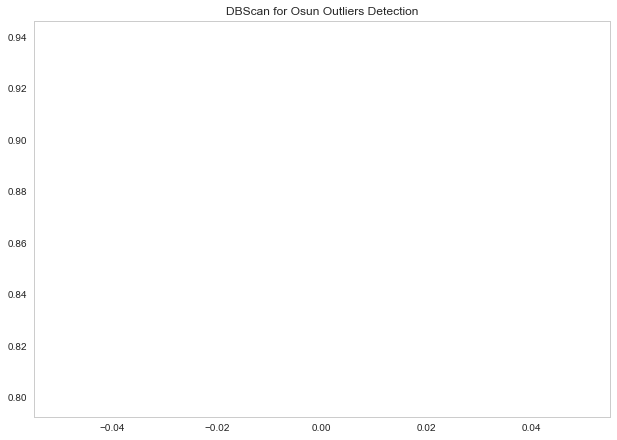

In [252]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors =model.labels_

ax.scatter(y = osun_e[:],x = colors,c = colors)
plt.title("DBScan for Osun Outliers Detection")
plt.grid()

#### Ondo State

In [253]:
ondo_e = ondo_energy.iloc[:,1:]
model2 = DBSCAN(eps=0.5, min_samples=2).fit(ondo_e)
print(model2)

DBSCAN(min_samples=2)


In [254]:
print(model2.labels_)

[0 0 0 ... 0 0 0]


In [255]:
outliers_ondo = pd.DataFrame(ondo_e)
print(Counter(model2.labels_))
print(outliers_ondo[model2.labels_==-1])

Counter({0: 11870})
Empty DataFrame
Columns: [energy]
Index: []


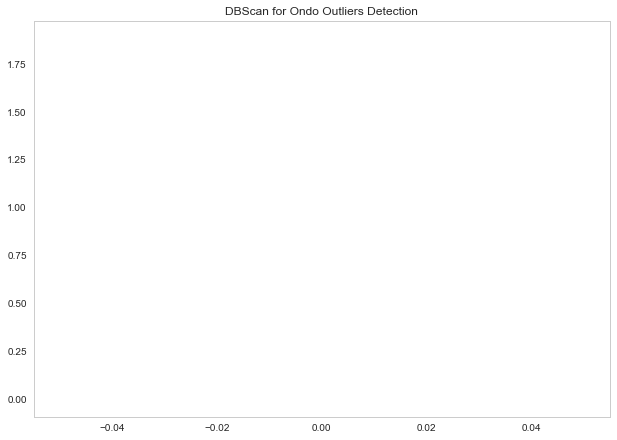

In [256]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors=model2.labels_

ax.scatter(y = ondo_e[:],x = colors,c = colors)
plt.title("DBScan for Ondo Outliers Detection")
plt.grid()

In [257]:
outliers = outliers_ondo[model2.labels_==-1]

In [258]:
def get_real_neigbour(energy_index):
    print("The neighbour of {0} are \n {1} and \n{2}".format( 
        ondo_e.loc[energy_index].energy,
        ondo_e.loc[energy_index-1].energy,
        ondo_e.loc[energy_index+1].energy,)
         )

In [259]:
outliers_ondo.iloc[0,:1].energy

2.61e-06

In [260]:
def rowindex(row):
    return row.name

In [261]:
outliers.apply(rowindex, axis=1)

Series([], dtype: float64)

In [262]:
#outliers_index.apply(lambda df:get_real_neigbour(df))

In [263]:
outliers_indexed = list(outliers.index)

In [264]:
ondo_energy.drop(outliers_indexed, axis=0,inplace=True)

In [265]:
ondo_df = ondo_energy
osun_df = osun_energy

In [266]:
ondo_df.iloc[-48:]

,timestamp,energy
1977,2021-08-20 17:10:22,0.901481
1976,2021-08-20 17:10:58,0.901482
1975,2021-08-20 17:11:36,0.901482
1974,2021-08-20 17:12:13,0.901483
1973,2021-08-20 17:12:50,0.901484
1972,2021-08-20 17:13:27,0.901485
1971,2021-08-20 17:14:03,0.901485
1970,2021-08-20 17:14:41,0.901486
1969,2021-08-20 17:15:17,0.901487
1968,2021-08-20 17:15:55,0.901487


In [267]:
osun_df.iloc[-48:]

,timestamp,energy
47,2021-08-16 14:32:22.093051,0.938408
46,2021-08-16 14:32:59.062031,0.938409
45,2021-08-16 14:33:39.348070,0.938410
44,2021-08-16 14:34:13.200457,0.938411
43,2021-08-16 20:07:09.615840,0.938536
42,2021-08-16 20:07:58.697593,0.938538
41,2021-08-16 20:08:28.411132,0.938539
40,2021-08-16 20:09:07.972569,0.938540
39,2021-08-16 20:09:41.559796,0.938540
38,2021-08-16 20:11:01.310188,0.938542


In [268]:
ondo_df.set_index('timestamp', inplace=True)
osun_df.set_index('timestamp', inplace=True)

In [269]:
ondo_df = ondo_df.resample('1H').agg({
   'energy':'sum',
})

In [270]:
osun_df = osun_df.resample('1H').agg({
    'energy':'sum',
})

### Data Normalization

In [271]:
from sklearn.preprocessing import MinMaxScaler

In [272]:
np.array(ondo_df['energy'])

array([3.42300000e-05, 6.21950000e-04, 6.61818000e-03, ...,
       0.00000000e+00, 0.00000000e+00, 5.58925412e+01])

In [273]:
scalar = MinMaxScaler()
ondo_scaled = scalar.fit_transform(np.array(ondo_df['energy']).reshape(-1, 1))
osun_scaled = scalar.fit_transform(np.array(osun_df['energy']).reshape(-1, 1))

In [274]:
ondo_df_scaled = ondo_df.copy()
osun_df_scaled = osun_df.copy()

In [275]:
ondo_df_scaled['energy'] = ondo_scaled
osun_df_scaled['energy'] = osun_scaled


In [276]:
ondo_df['norm_energy'] = ondo_df_scaled['energy']
osun_df['norm_energy'] = osun_df_scaled['energy']

In [277]:
ondo_scaled

array([[2.00036930e-07],
       [3.63461783e-06],
       [3.86760271e-05],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [3.26630802e-01]])

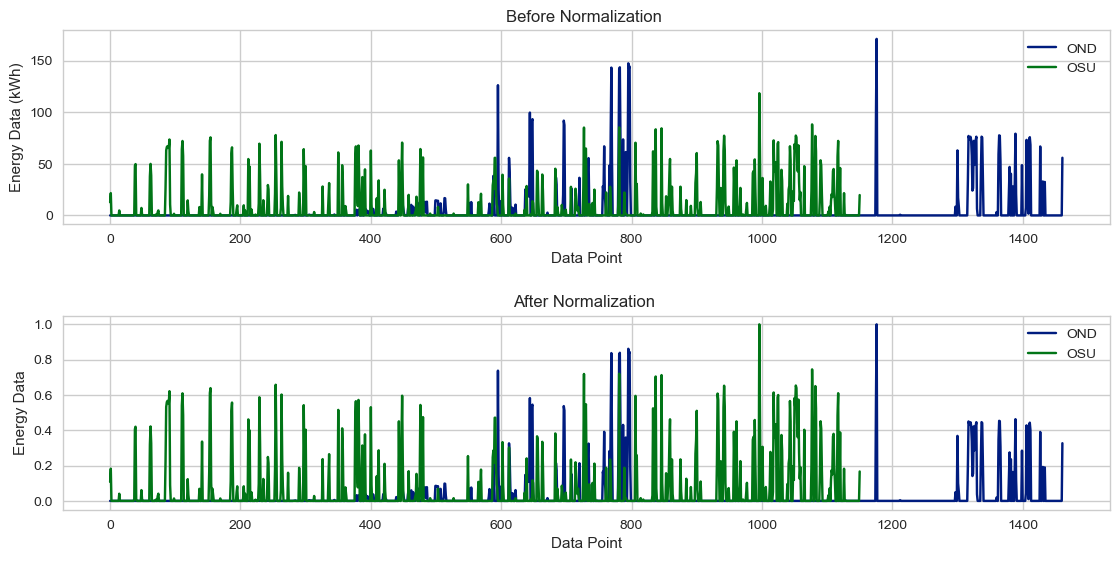

In [278]:
plt.figure(figsize=(12, 6), dpi=100)  # create a plot figure
plt.style.use('seaborn-whitegrid')
# create the first of two panels and set current axis


# create the second panel and set current axis
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(ondo_df['energy'])), ondo_df['energy'], label="OND");
plt.plot(np.arange(len(osun_df['energy'])), osun_df['energy'], label="OSU");
plt.title("Before Normalization ")
plt.xlabel("Data Point")
plt.ylabel("Energy Data (kWh)")
plt.legend()
plt.tight_layout(pad=3.0)

plt.subplot(2, 1, 2) # (rows, columns, panel number)
plt.plot(np.arange(len(ondo_df_scaled['energy'])), ondo_df_scaled['energy'], label="OND")
plt.plot(np.arange(len(osun_df_scaled['energy'])), osun_df_scaled['energy'], label="OSU")
plt.title("After Normalization ")
plt.xlabel("Data Point")
plt.ylabel("Energy Data")
plt.legend()

plt.savefig('results/normalization.png')

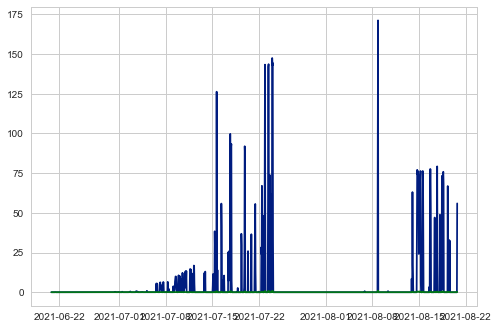

In [279]:
plt.plot(ondo_df)

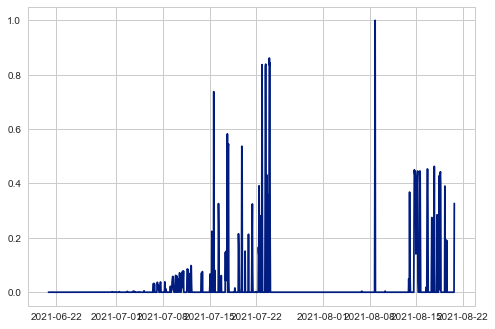

In [280]:
plt.plot(ondo_df_scaled)

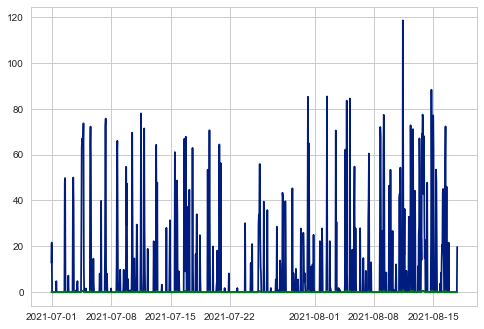

In [281]:
plt.plot(osun_df)

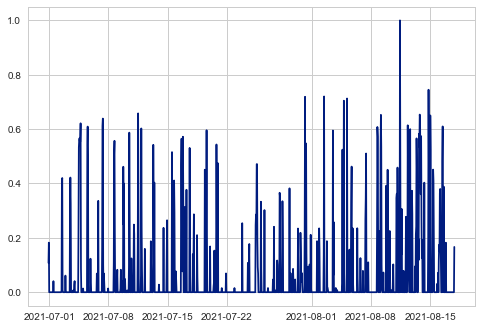

In [282]:
plt.plot(osun_df_scaled)

#### Kmeans

In [283]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,calinski_harabasz_score,silhouette_score


In [284]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
 )

In [285]:
kmeans.fit(ondo_scaled)

KMeans(init='random', n_clusters=3, random_state=42)

In [286]:
kmeans.inertia_

1.3479268900095802

In [287]:
kmeans.cluster_centers_

array([[0.00513231],
       [0.84786774],
       [0.36503569]])

In [288]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse_ondo = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(ondo_scaled)
    sse_ondo.update({k: kmeans.inertia_})

In [289]:
sse_ondo

{2: 2.8414903746543914,
 3: 1.3479268900095802,
 4: 0.57175479255872,
 5: 0.523998115398668,
 6: 0.30546225073700756,
 7: 0.2963237808915207,
 8: 0.11471791561147994,
 9: 0.08826737492709114}

In [290]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse_osun = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(osun_scaled)
    sse_osun.update({k: kmeans.inertia_})

In [291]:
sse_osun

{2: 4.810057519225204,
 3: 1.829871901905147,
 4: 1.0522745892494072,
 5: 0.8237774109442733,
 6: 0.480116155962036,
 7: 0.35989672887018265,
 8: 0.2797615341659758,
 9: 0.23305862490419105}

In [292]:
ondo_scaled

array([[2.00036930e-07],
       [3.63461783e-06],
       [3.86760271e-05],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [3.26630802e-01]])

In [293]:
davies_bouldin_scores1 = {}
davies_bouldin_scores2 = {}
silhouette_score1 = {}
silhouette_score2 = {}
#OND -1, OSU -2
 # Notice you start at 2 clusters for davies_bouldin_score coefficient
for k in range(2, 10):
    kmeans1 = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans2 = KMeans(n_clusters=k, **kmeans_kwargs)
    model1 = kmeans1.fit_predict(ondo_scaled)
    model2 = kmeans2.fit_predict(osun_scaled)
    db_index1 = davies_bouldin_score(ondo_scaled, model1)
    db_index2 = davies_bouldin_score(osun_scaled, model2)
    sh_index1 = silhouette_score(ondo_scaled, model1)
    sh_index2 = silhouette_score(osun_scaled, model2)
    # dbi, chi and si of OND
    davies_bouldin_scores1.update({k: db_index1})
    silhouette_score1.update({k: sh_index1})
    # dbi, chi and si of OSU
    davies_bouldin_scores2.update({k: db_index2})
    silhouette_score2.update({k: sh_index2})

In [294]:
davies_bouldin_scores1 

{2: 0.3152730353121927,
 3: 0.2784115811164763,
 4: 0.3495029321031884,
 5: 0.29531299938987315,
 6: 0.34640246803042235,
 7: 0.29957587202857505,
 8: 0.38949929510935155,
 9: 0.35770243460866613}

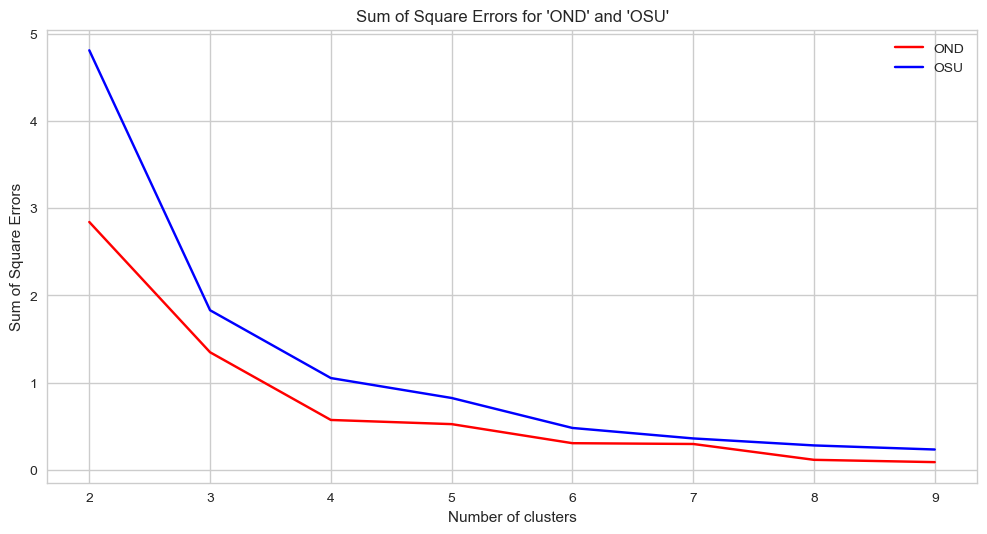

In [295]:
plt.figure(figsize=(12, 6), dpi=100)  # create a plot figure
plt.style.use('seaborn-whitegrid')


plt.subplot()
plt.plot(list(sse_ondo.keys()), list(sse_ondo.values()), label="OND",c='red')
plt.plot(list(sse_osun.keys()), list(sse_osun.values()), label="OSU",c='blue')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Errors")

plt.title("Sum of Square Errors for 'OND' and 'OSU'")
plt.legend()

fig.tight_layout()
plt.savefig('results/sse.png')

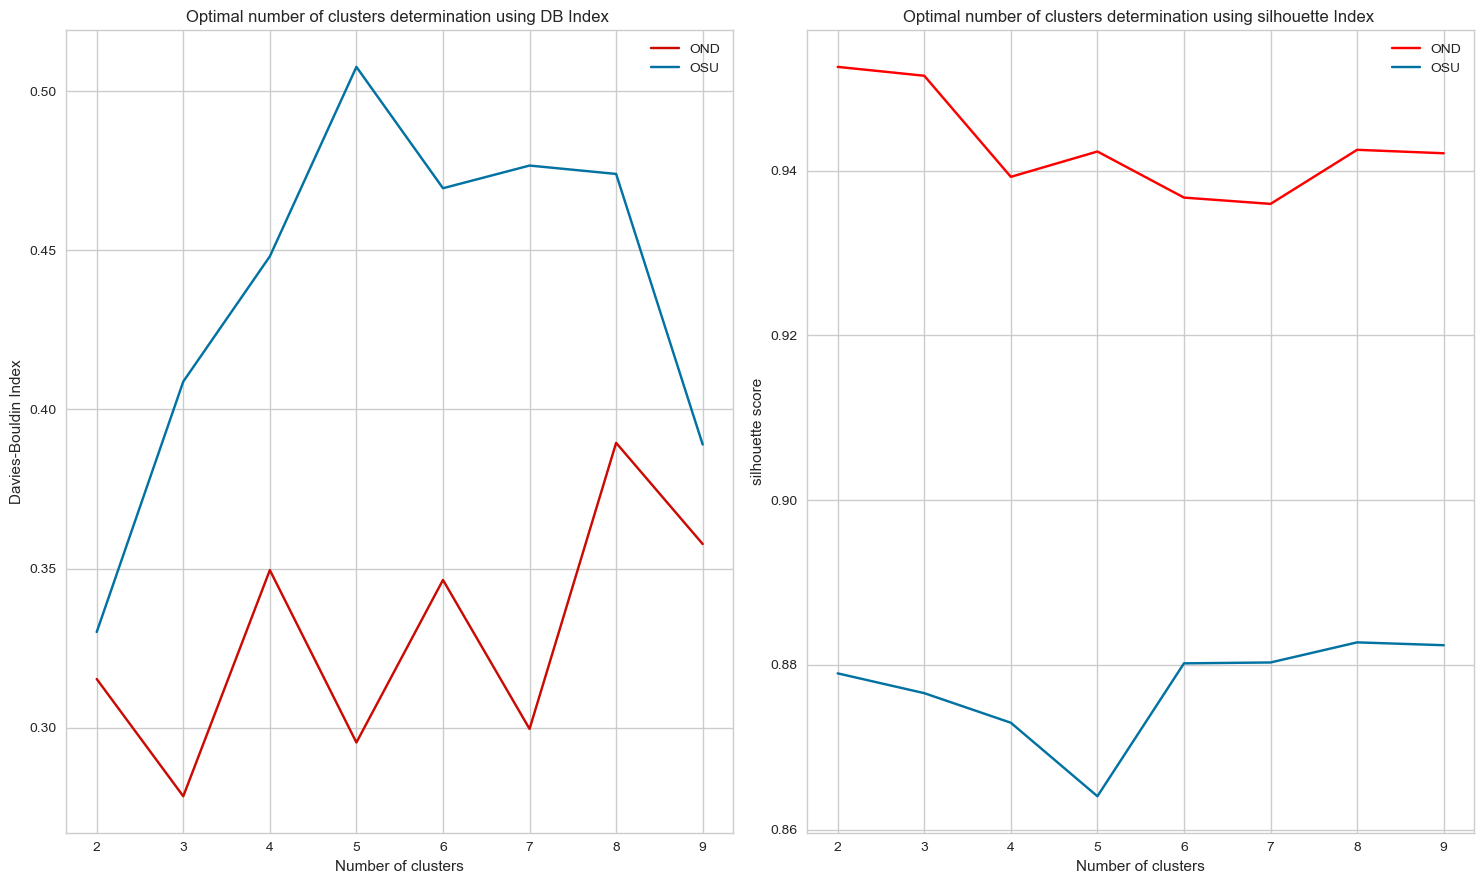

In [296]:
 # create a plot figure
plt.style.use('seaborn-whitegrid')


fig ,(ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(15,9),dpi=100)

ax1.plot(list(davies_bouldin_scores1.keys()), list(davies_bouldin_scores1.values()),label='OND',c='r')
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Davies-Bouldin Index")
ax1.set_title("Optimal number of clusters determination using DB Index ")
ax1.legend()




ax3.plot(list(silhouette_score1.keys()), list(silhouette_score1.values()), label="OND",c='red')
ax3.set_xlabel("Number of clusters")
ax3.set_ylabel("silhouette score Index")
ax3.set_title("Optimal number of clusters determination using silhouette Index ")
ax3.legend()

ax1.plot(list(davies_bouldin_scores2.keys()), list(davies_bouldin_scores2.values()),label='OSU',c='b')
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Davies-Bouldin Index")
ax1.set_title("Optimal number of clusters determination using DB Index ")
ax1.legend()



ax3.plot(list(silhouette_score2.keys()), list(silhouette_score2.values()), label='OSU',c='b')
ax3.set_xlabel("Number of clusters")
ax3.set_ylabel("silhouette score")
ax3.set_title("Optimal number of clusters determination using silhouette Index ")
ax3.legend()

fig.tight_layout()
plt.savefig('results/indicies.png')



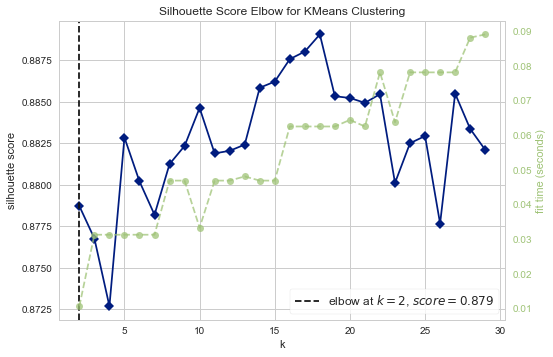

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [297]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(osun_scaled)        # Fit the data to the visualizer
visualizer.show()      

### Ondo CLUSTERED

In [298]:
kmeans_od = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42)

# A list holds the SSE values for each k
kmeans_od.fit(ondo_scaled)
kmeans_od.inertia_

1.3479268900095802

In [299]:
ondo_df['cluster'] = kmeans_od.labels_+1
ondo_df['day_name'] = ondo_df.index.day_name()
ondo_df['hour'] = ondo_df.index.hour + 1

In [300]:
ondo_df

,energy,norm_energy,cluster,day_name,hour
timestamp,,,,,
2021-06-20 20:00:00,0.000034,2.000369e-07,1,Sunday,21
2021-06-20 21:00:00,0.000622,3.634618e-06,1,Sunday,22
2021-06-20 22:00:00,0.006618,3.867603e-05,1,Sunday,23
2021-06-20 23:00:00,0.014099,8.239429e-05,1,Sunday,24
2021-06-21 00:00:00,0.021644,1.264872e-04,1,Monday,1
...,...,...,...,...,...
2021-08-20 13:00:00,0.000000,0.000000e+00,1,Friday,14
2021-08-20 14:00:00,0.000000,0.000000e+00,1,Friday,15
2021-08-20 15:00:00,0.000000,0.000000e+00,1,Friday,16


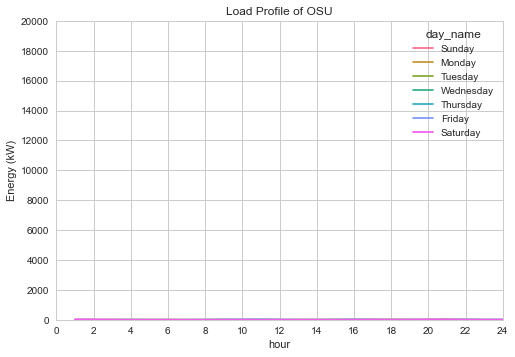

In [301]:
ax = sns.lineplot(x="hour", y="energy", hue="day_name", data=ondo_df)
# control x and y limits
plt.ylim(0, 20000)
plt.xlim(0, 24)
plt.ylabel('Energy (kW)')
plt.title("Load Profile of OSU")
plt.locator_params(axis="y", nbins=10)
plt.locator_params(axis="x", nbins=23)
fig = ax.get_figure()
fig.savefig('ondo003_load_profile.png')

<AxesSubplot:xlabel='timestamp', ylabel='energy'>

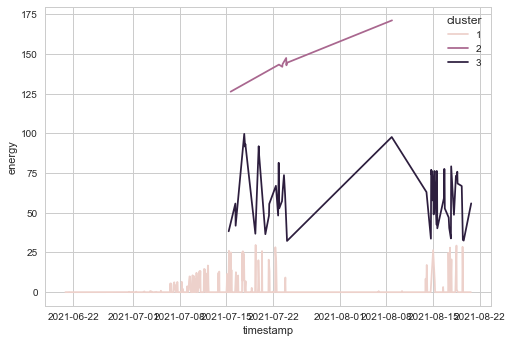

In [302]:
sns.lineplot(x = "timestamp", y = 'energy', hue='cluster',data=ondo_df)

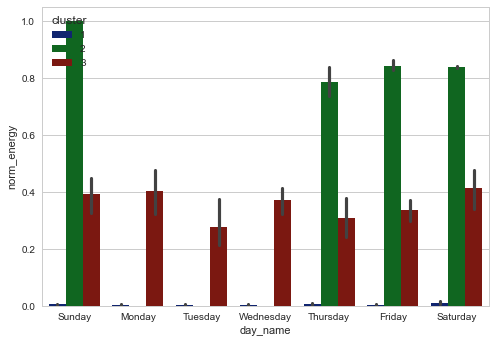

In [303]:
ax = sns.barplot(x="day_name", y="norm_energy",hue='cluster', data=ondo_df)

In [304]:
ondo_clus1 = ondo_df[ondo_df['cluster'] == 1]
ondo_clus2 = ondo_df[ondo_df['cluster'] == 2]
ondo_clus3 = ondo_df[ondo_df['cluster'] == 3]

### Osun CLUSTERED

In [305]:
kmeans_os = KMeans(
        init="random",
        n_clusters=5,
        n_init=10,
        max_iter=300,
        random_state=42)

# A list holds the SSE values for each k
kmeans_os.fit(osun_scaled)
kmeans_os.inertia_

0.8237774109442734

In [306]:
osun_df['cluster'] = kmeans_os.labels_+1
osun_df['day_name'] = osun_df.index.day_name()
osun_df['hour'] = osun_df.index.hour + 1

In [307]:
df_hour_osun = osun_df.pivot(columns='hour',values='energy')
df_hour_osun.index = osun_df.index.date
df_hour_osun = df_hour_osun.replace(np.nan,0)
df_hour_osun

hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,12.792745,0.000000
2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,21.598325
2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


<AxesSubplot:xlabel='timestamp', ylabel='energy'>

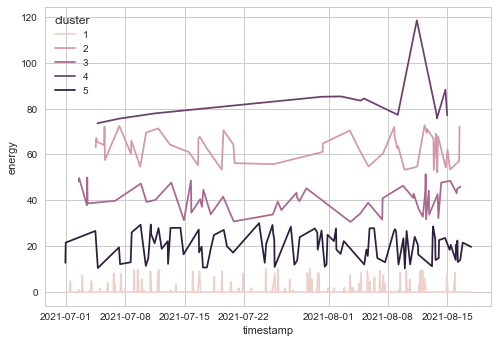

In [308]:
sns.lineplot(x = "timestamp", y = 'energy', hue='cluster',data=osun_df)

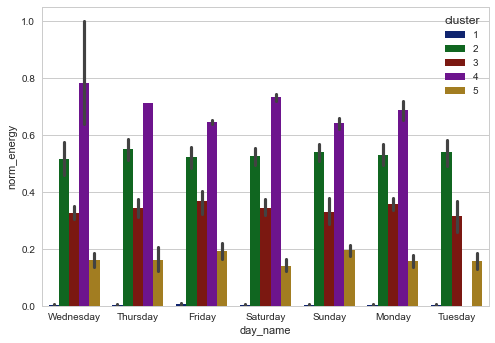

In [309]:
ax = sns.barplot(x="day_name", y="norm_energy",hue='cluster', data=osun_df)

In [310]:
osun_clus1 = osun_df[osun_df['cluster'] == 1]
osun_clus2 = osun_df[osun_df['cluster'] == 2]
osun_clus3 = osun_df[osun_df['cluster'] == 3]
osun_clus4 = osun_df[osun_df['cluster'] == 4]
osun_clus5 = osun_df[osun_df['cluster'] == 5]

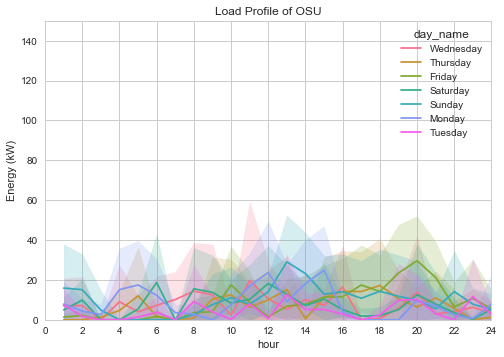

In [311]:
ax = sns.lineplot(x="hour", y="energy", hue="day_name", data=osun_df)
# control x and y limits
plt.ylim(0, 150)
plt.xlim(0, 24)
plt.ylabel('Energy (kW)')
plt.title("Load Profile of OSU")
plt.locator_params(axis="y", nbins=10)
plt.locator_params(axis="x", nbins=23)
fig = ax.get_figure()
fig.savefig('osun003_load_profile.png')

### Agglomerative Hierarchical Clustering

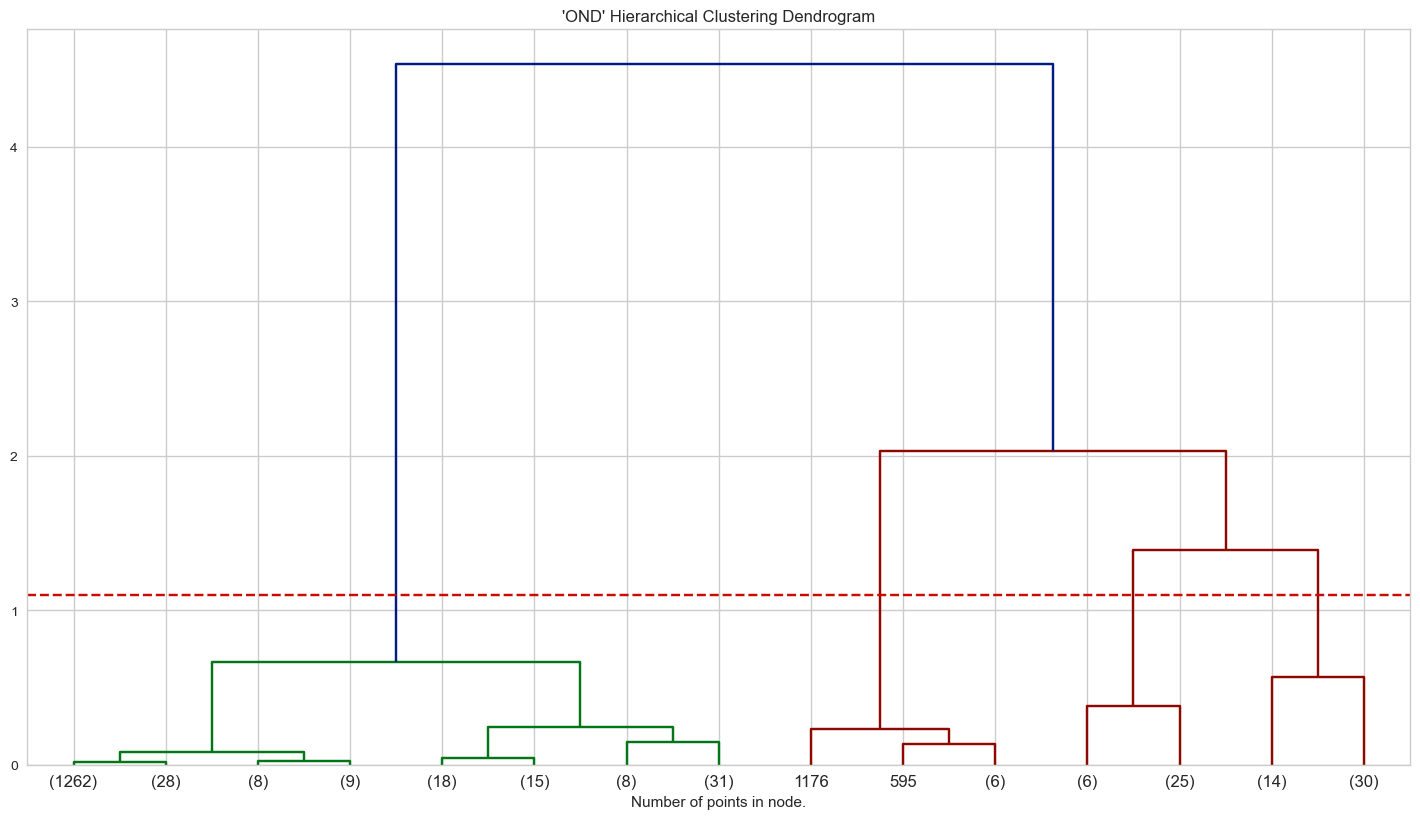

In [312]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


fig ,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9),dpi=100)
plt.style.use('seaborn-whitegrid')

model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model2 = model2.fit(ondo_scaled)
ax.set_title("'OND' Hierarchical Clustering Dendrogram")
plot_dendrogram(model2, truncate_mode='level', p=3)
# plot the top three levels of the dendrogram
ax.set_xlabel("Number of points in node.")
plt.axhline(y=1.1,color='r', linestyle='--')
plt.show
plt.tight_layout(pad=3.0)

plt.savefig('results/dendo_ondo.png')


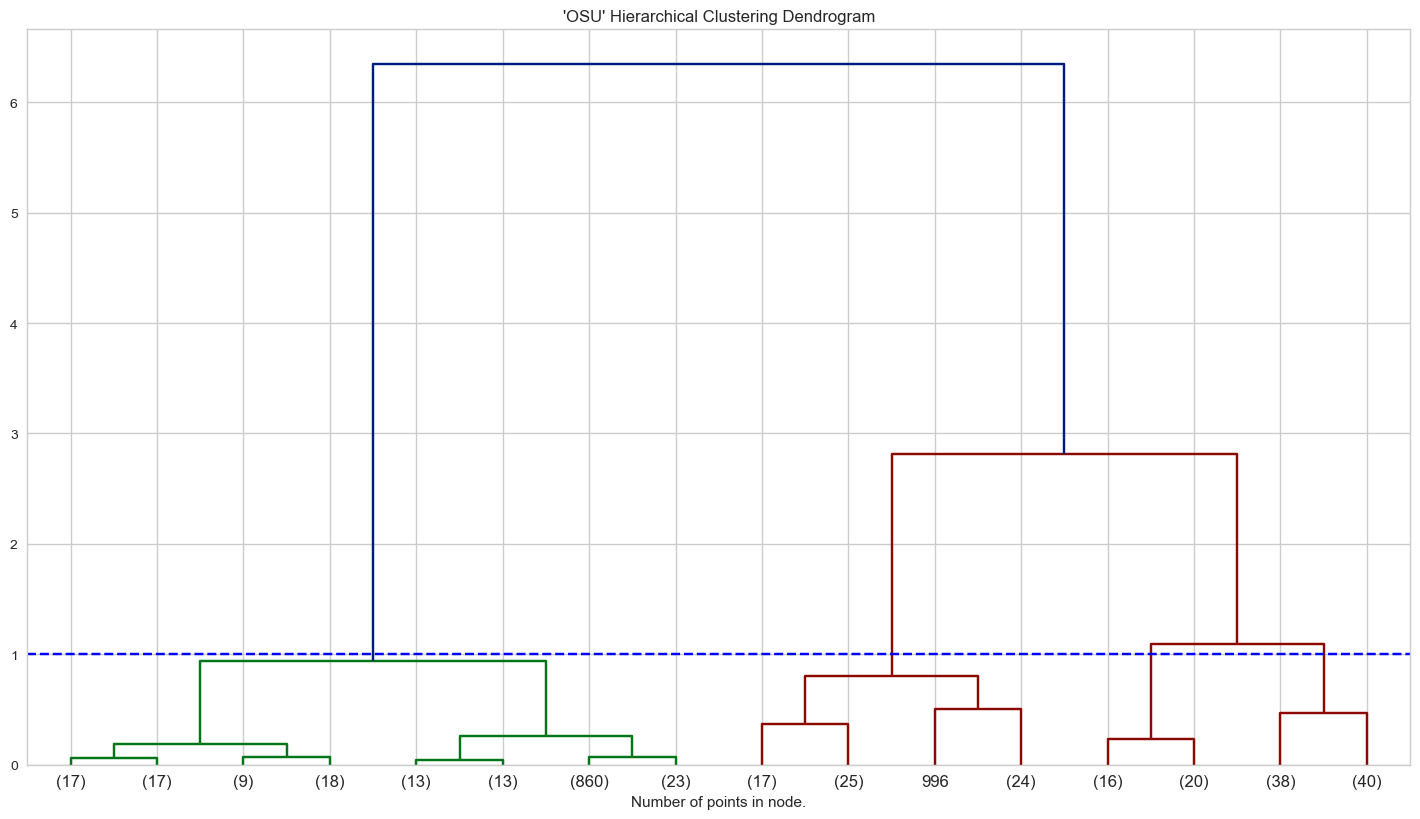

In [313]:

fig ,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9),dpi=100)
plt.style.use('seaborn-whitegrid')

model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model2 = model2.fit(osun_scaled)
ax.set_title("'OSU' Hierarchical Clustering Dendrogram")
plot_dendrogram(model2, truncate_mode='level', p=3)
# plot the top three levels of the dendrogram
ax.set_xlabel("Number of points in node.")
plt.axhline(y=1.0,color='blue', linestyle='--')
plt.show
plt.tight_layout(pad=3.0)

plt.savefig('results/dendo_osun.png')

In [314]:
h_davies_bouldin_scores1 = {}
h_davies_bouldin_scores2 = {}
h_silhouette_score1 = {}
h_silhouette_score2 = {}
#OND -1, OSU -2
 # Notice you start at 2 clusters for davies_bouldin_score coefficient
for k in range(2, 10):
    h1 = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    h2= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    model1 =h1.fit_predict(ondo_scaled)
    model2 = h2.fit_predict(osun_scaled)
    db_index1 = davies_bouldin_score(ondo_scaled, model1)
    db_index2 = davies_bouldin_score(osun_scaled, model2)
    ch_index1 = calinski_harabasz_score(ondo_scaled, model1)
    ch_index2 = calinski_harabasz_score(osun_scaled, model2)
    sh_index1 = silhouette_score(ondo_scaled, model1)
    sh_index2 = silhouette_score(osun_scaled, model2)
    # dbi, chi and si of OND
    h_davies_bouldin_scores1.update({k: db_index1})
    h_silhouette_score1.update({k: sh_index1})
    # dbi, chi and si of OSU
    h_davies_bouldin_scores2.update({k: db_index2})
    h_silhouette_score2.update({k: sh_index2})

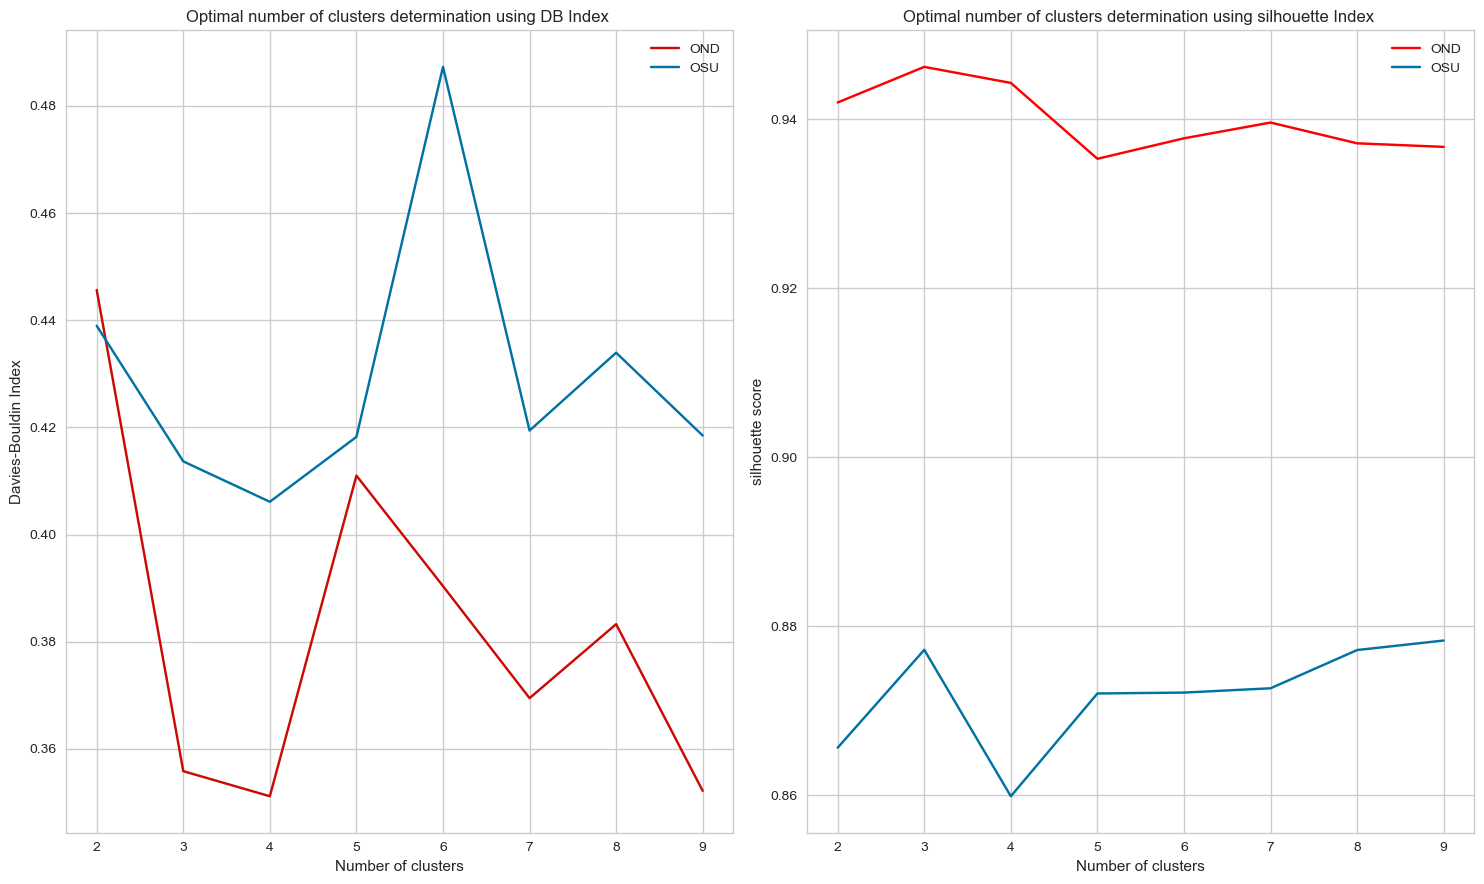

In [315]:
 # create a plot figure
plt.style.use('seaborn-whitegrid')


fig ,(ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(15,9),dpi=100)

ax1.plot(list(h_davies_bouldin_scores1.keys()), list(h_davies_bouldin_scores1.values()),label='OND',c='r')
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Davies-Bouldin Index")
ax1.set_title("Optimal number of clusters determination using DB Index ")
ax1.legend()




ax3.plot(list(h_silhouette_score1.keys()), list(h_silhouette_score1.values()), label="OND",c='red')
ax3.set_xlabel("Number of clusters")
ax3.set_ylabel("silhouette score Index")
ax3.set_title("Optimal number of clusters determination using silhouette Index ")
ax3.legend()

ax1.plot(list(h_davies_bouldin_scores2.keys()), list(h_davies_bouldin_scores2.values()),label='OSU',c='b')
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Davies-Bouldin Index")
ax1.set_title("Optimal number of clusters determination using DB Index ")
ax1.legend()



ax3.plot(list(h_silhouette_score2.keys()), list(h_silhouette_score2.values()), label='OSU',c='b')
ax3.set_xlabel("Number of clusters")
ax3.set_ylabel("silhouette score")
ax3.set_title("Optimal number of clusters determination using silhouette Index ")
ax3.legend()

fig.tight_layout()
plt.savefig('results/h_indicies.png')


In [316]:
dbi_ond_indicies = pd.DataFrame(index = h_silhouette_score1.keys(), data = {"Hierarchical Clustering (DBI)": h_davies_bouldin_scores1.values(), "K-Means (DBI)": davies_bouldin_scores1.values()})
dbi_ond_indicies.index.name = "Number of Clusters"




si_ond_indicies = pd.DataFrame(index = h_silhouette_score1.keys(), data = {"Hierarchical Clustering (Silhouette)": h_silhouette_score1.values(),"K-Means (Silhouette)": silhouette_score1.values() })
si_ond_indicies.index.name = "Number of Clusters"

In [317]:
dbi_osu_indicies = pd.DataFrame(index = h_silhouette_score2.keys(), data = {"Hierarchical Clustering (DBI)": h_davies_bouldin_scores2.values(), "K-Means (DBI)": davies_bouldin_scores2.values()})
dbi_osu_indicies.index.name = "Number of Clusters"




si_osu_indicies = pd.DataFrame(index = h_silhouette_score2.keys(), data = {"Hierarchical Clustering (Silhouette)": h_silhouette_score2.values(),"K-Means (Silhouette)": silhouette_score2.values() })
si_osu_indicies.index.name = "Number of Clusters"

In [318]:
import dataframe_image as dfi

In [319]:
dbi_ond_df_styled = dbi_ond_indicies.style.background_gradient()
dbi_osu_df_styled = dbi_osu_indicies.style.background_gradient()

In [320]:
si_ond_df_styled = si_ond_indicies.style.background_gradient()
si_osu_df_styled = si_osu_indicies.style.background_gradient()

In [321]:
dfi.export(dbi_ond_df_styled,"results/OND_DBI_RESULT.png")
dfi.export(dbi_osu_df_styled,"results/OSU_DBI_RESULT.png")

In [322]:
dfi.export(si_ond_df_styled,"results/OND_SI_RESULT.png")
dfi.export(si_osu_df_styled,"results/OSU_SI_RESULT.png")

In [323]:
from sklearn.cluster import AgglomerativeClustering
ondo_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
ondo_cluster.fit(ondo_scaled)
h_ondo_df = ondo_df.copy()

In [324]:
h_ondo_df['cluster'] = ondo_cluster.labels_+1
h_ondo_df['day_name'] = h_ondo_df.index.day_name()
h_ondo_df['hour'] = h_ondo_df.index.hour + 1

In [325]:
from sklearn.cluster import AgglomerativeClustering
osun_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
osun_cluster.fit(osun_scaled)
h_osun_df = osun_df.copy()

In [326]:
h_osun_df['cluster'] = osun_cluster.labels_+1
h_osun_df['day_name'] = h_osun_df.index.day_name()
h_osun_df['hour'] = h_osun_df.index.hour + 1

In [327]:
h_ondo_df 

,energy,norm_energy,cluster,day_name,hour
timestamp,,,,,
2021-06-20 20:00:00,0.000034,2.000369e-07,1,Sunday,21
2021-06-20 21:00:00,0.000622,3.634618e-06,1,Sunday,22
2021-06-20 22:00:00,0.006618,3.867603e-05,1,Sunday,23
2021-06-20 23:00:00,0.014099,8.239429e-05,1,Sunday,24
2021-06-21 00:00:00,0.021644,1.264872e-04,1,Monday,1
...,...,...,...,...,...
2021-08-20 13:00:00,0.000000,0.000000e+00,1,Friday,14
2021-08-20 14:00:00,0.000000,0.000000e+00,1,Friday,15
2021-08-20 15:00:00,0.000000,0.000000e+00,1,Friday,16


In [328]:
h_osun_df.index.strftime('%m/%d')

Index(['06/30', '06/30', '07/01', '07/01', '07/01', '07/01', '07/01', '07/01',
       '07/01', '07/01',
       ...
       '08/17', '08/17', '08/17', '08/17', '08/17', '08/17', '08/17', '08/17',
       '08/17', '08/17'],
      dtype='object', name='timestamp', length=1151)

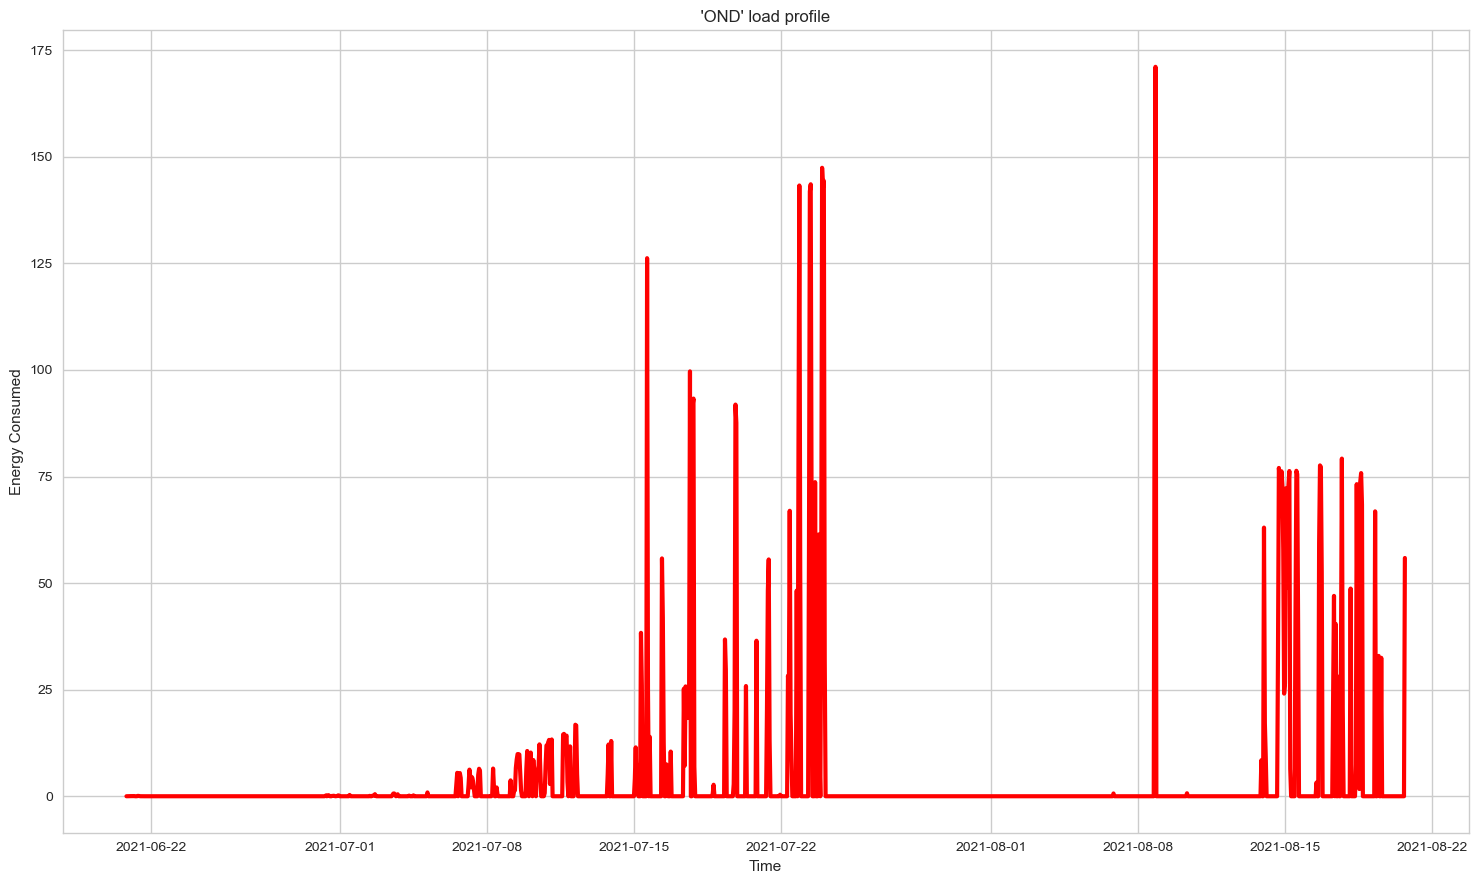

In [329]:
fig ,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9),dpi=100)
ax.plot(h_ondo_df.index, h_ondo_df.energy, color = 'red', linewidth=3)
ax.set_xlabel("Time")
ax.set_ylabel("Energy Consumed")
ax.set_title(" 'OND' load profile ")
fig.tight_layout()
plt.savefig('results/ond.png')

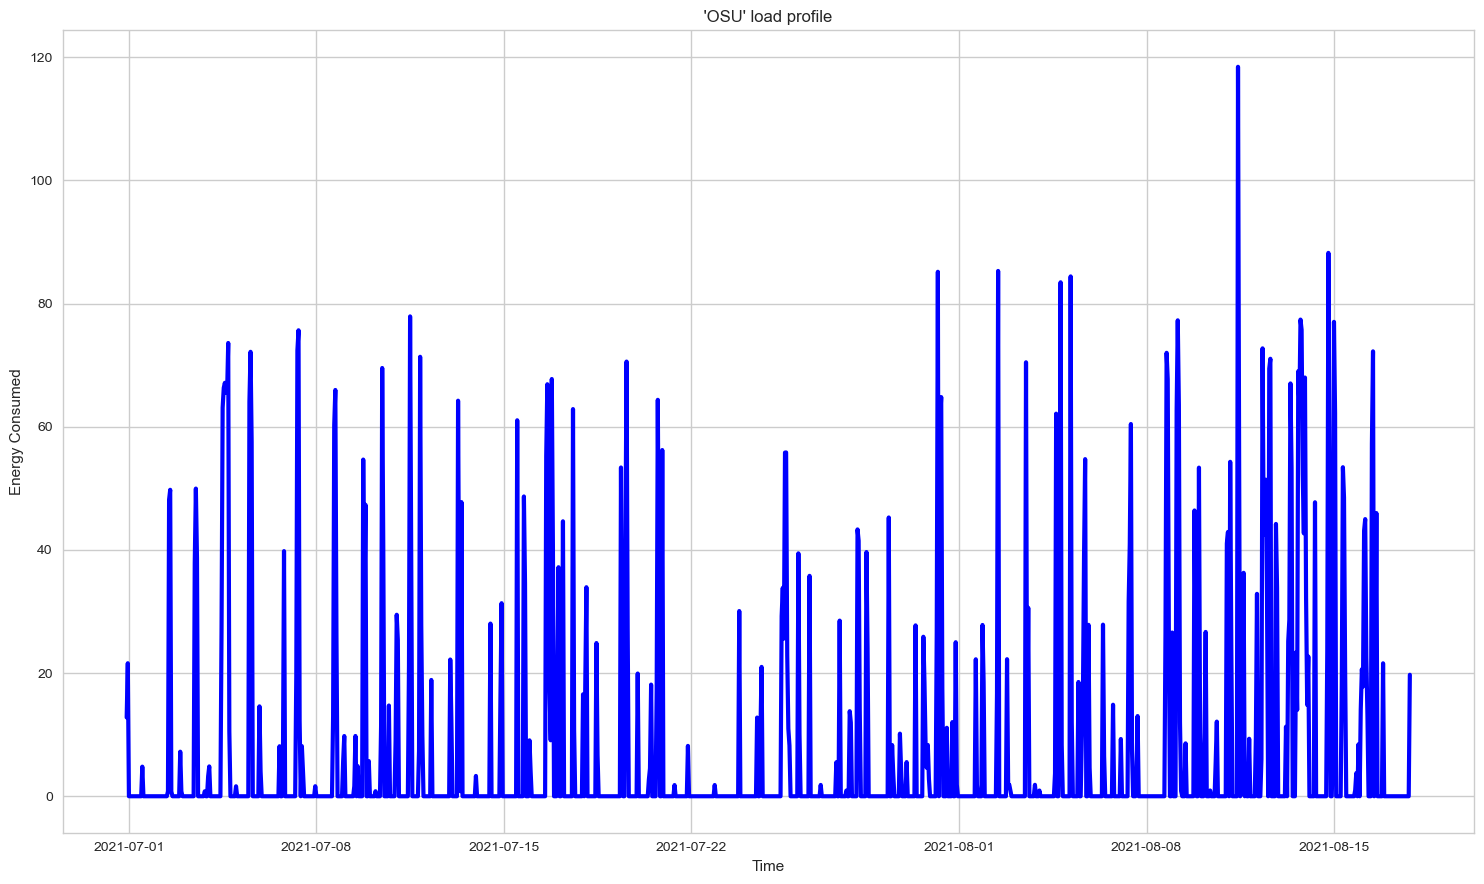

In [330]:
fig ,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9),dpi=100)
ax.plot(h_osun_df.index, h_osun_df.energy, color = 'blue', linewidth=3)
ax.set_xlabel("Time")
ax.set_ylabel("Energy Consumed")
ax.set_title(" 'OSU' load profile ")
fig.tight_layout()
plt.savefig('results/osu.png')


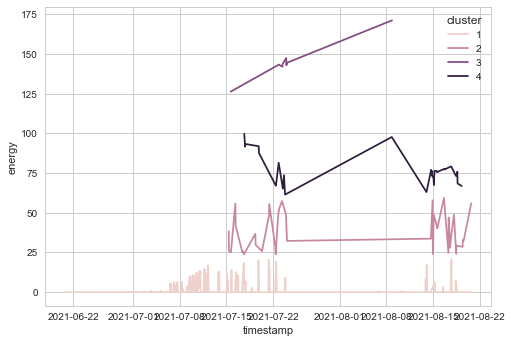

In [331]:
ax = sns.lineplot(x = "timestamp", y = 'energy', hue='cluster',data=h_ondo_df)

In [332]:
ondo_clus1 = h_ondo_df[h_ondo_df['cluster'] == 1]
ondo_clus2 = h_ondo_df[h_ondo_df['cluster'] == 2]
ondo_clus3 = h_ondo_df[h_ondo_df['cluster'] == 3]
ondo_clus4 = h_ondo_df[h_ondo_df['cluster'] == 4]

In [333]:
for a,b in zip((1,2,3),('a','b','c')):
    print(a,b)

1 a
2 b
3 c


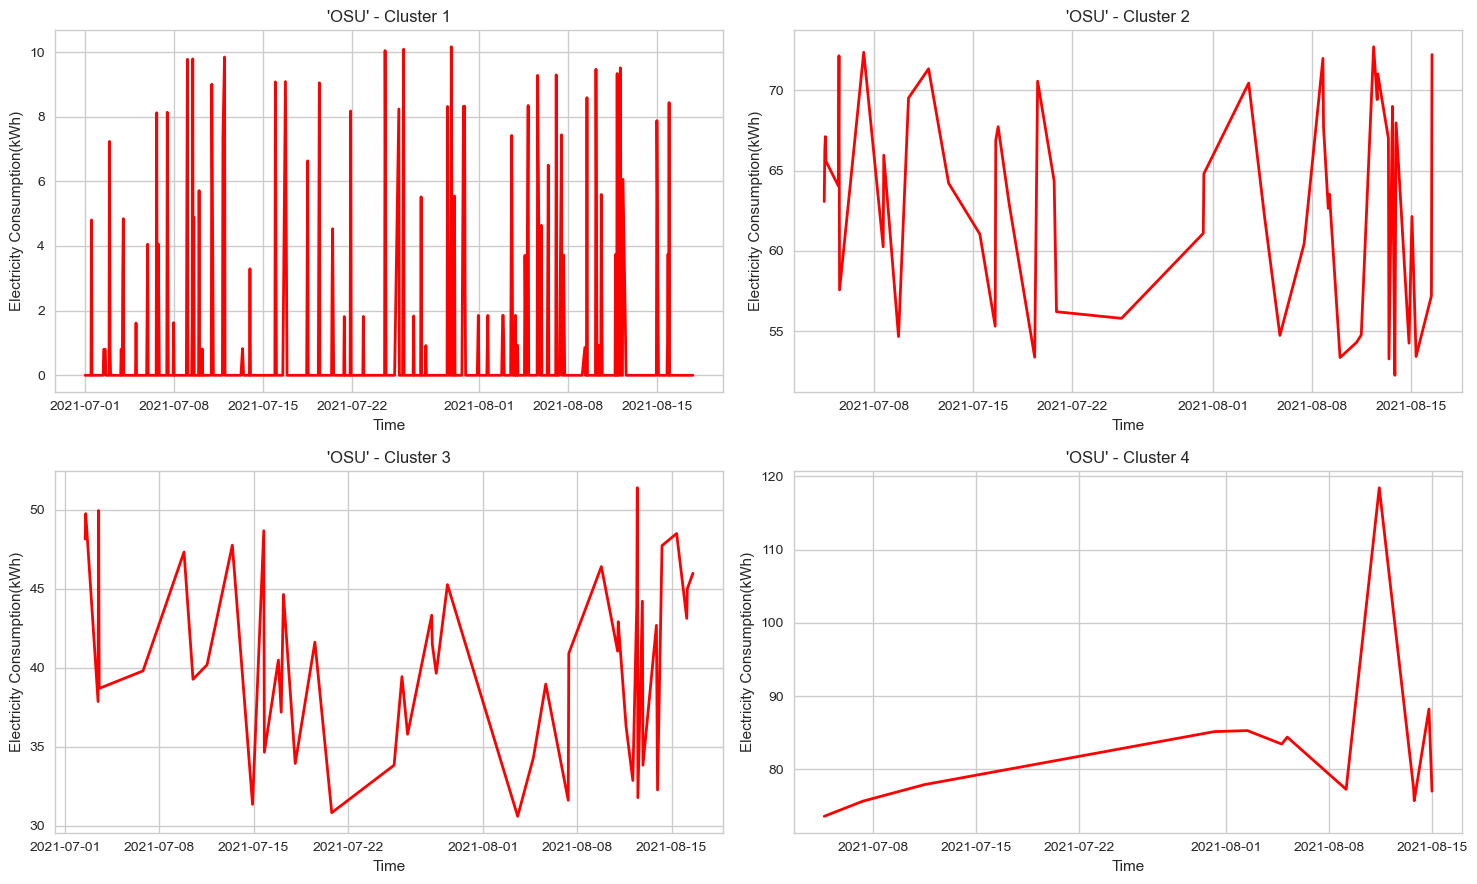

In [334]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,9),dpi=100)
for index, energy,rang,cluster_no in zip((osun_clus1.index,osun_clus2.index,osun_clus3.index,osun_clus4.index),(osun_clus1.energy,osun_clus2.energy,osun_clus3.energy,osun_clus4.energy),(221,222,223,224), (1,2,3,4)):
    ax=plt.subplot(rang)
    ax.plot(index,energy, color = 'red', linewidth=2)
    ax.set_xlabel("Time")
    ax.set_ylabel("Electricity Consumption(kWh)")
    ax.set_title("'OSU' - Cluster "+ str(cluster_no))
fig.tight_layout()
plt.savefig('results/osun_cluster.png')


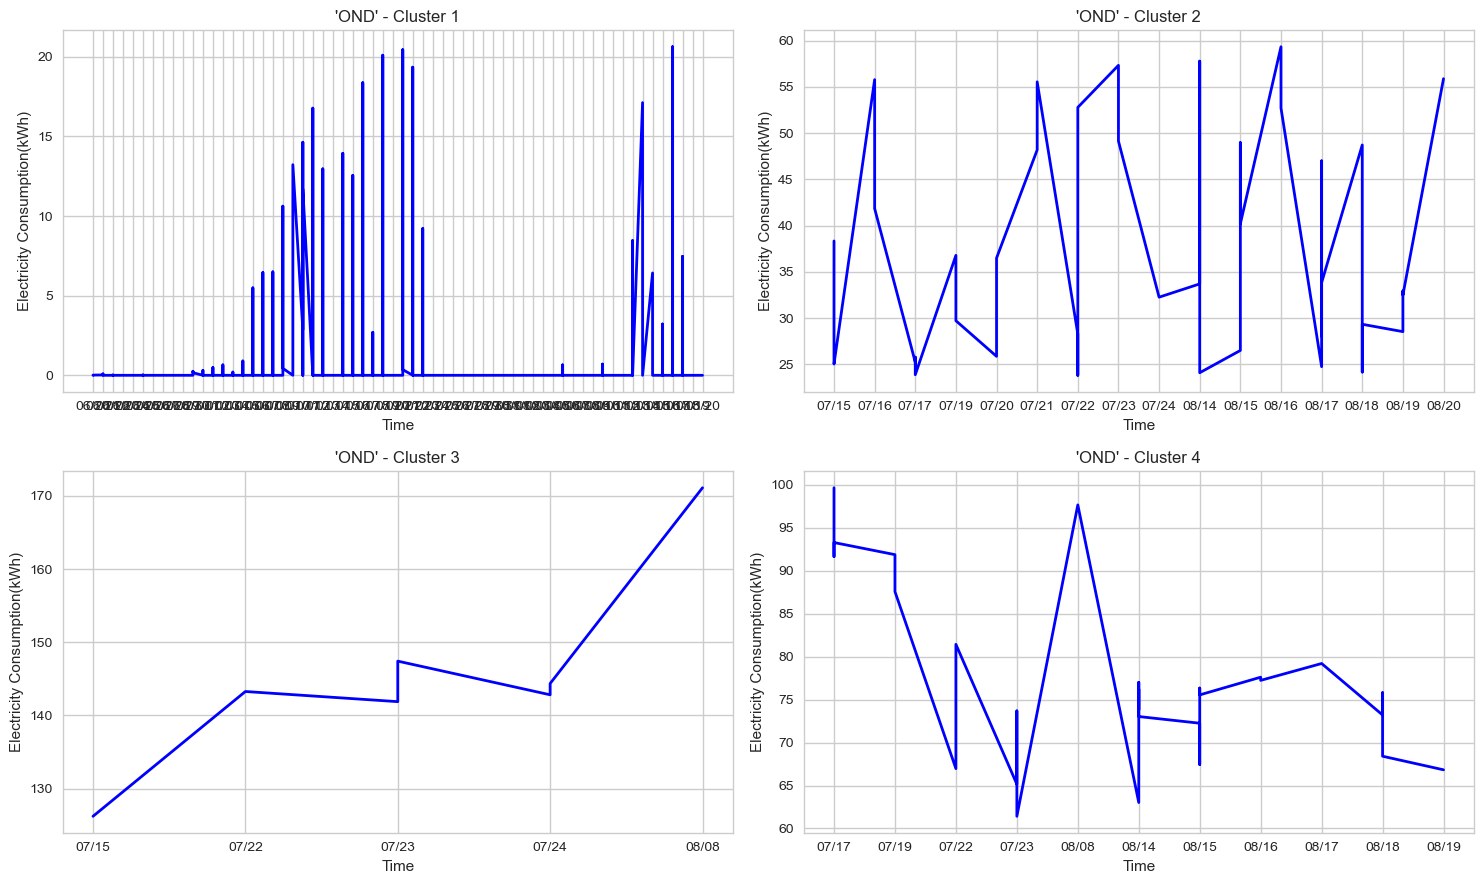

In [335]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,9),dpi=100)
for index, energy,rang,cluster_no in zip((ondo_clus1.index,ondo_clus2.index,ondo_clus3.index,ondo_clus4.index),(ondo_clus1.energy,ondo_clus2.energy,ondo_clus3.energy,ondo_clus4.energy),(221,222,223,224), (1,2,3,4)):
    ax=plt.subplot(rang)
    ax.plot(index.strftime('%m/%d'),energy, color = 'blue', linewidth=2)
    ax.set_xlabel("Time")
    ax.set_ylabel("Electricity Consumption(kWh)")
    ax.set_title("'OND' - Cluster "+ str(cluster_no))
fig.tight_layout()
plt.savefig('results/ondo_cluster.png')

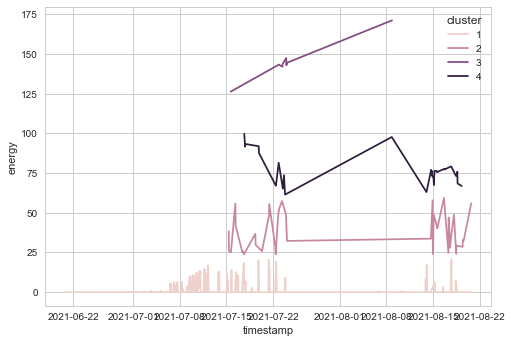

In [336]:
ax = sns.lineplot(x = "timestamp", y = 'energy', hue='cluster',data=h_ondo_df)

In [337]:
ondo_clus1

,energy,norm_energy,cluster,day_name,hour
timestamp,,,,,
2021-06-20 20:00:00,0.000034,2.000369e-07,1,Sunday,21
2021-06-20 21:00:00,0.000622,3.634618e-06,1,Sunday,22
2021-06-20 22:00:00,0.006618,3.867603e-05,1,Sunday,23
2021-06-20 23:00:00,0.014099,8.239429e-05,1,Sunday,24
2021-06-21 00:00:00,0.021644,1.264872e-04,1,Monday,1
...,...,...,...,...,...
2021-08-20 12:00:00,0.000000,0.000000e+00,1,Friday,13
2021-08-20 13:00:00,0.000000,0.000000e+00,1,Friday,14
2021-08-20 14:00:00,0.000000,0.000000e+00,1,Friday,15


<AxesSubplot:xlabel='day_name', ylabel='energy'>

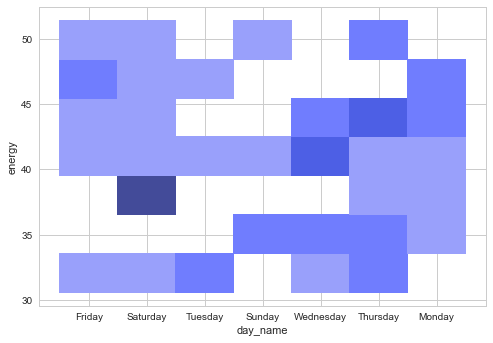

In [358]:
sns.histplot(x='day_name', y='energy', data=osun_clus3)

([<matplotlib.axis.XTick at 0x250675838e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

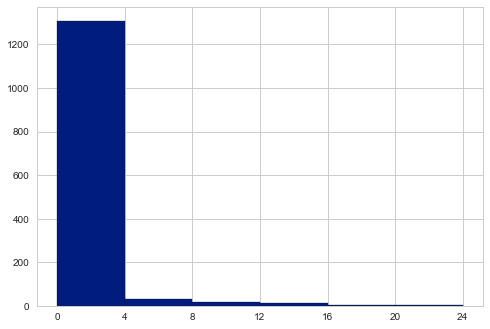

In [339]:
bins= [0,4,8,12,16,20,24]
plt.hist(ondo_clus1.energy, bins=bins, edgecolor="k")
plt.xticks(bins)

In [352]:
osun_clus1

,energy,norm_energy,cluster,day_name,hour
timestamp,,,,,
2021-07-01 00:00:00,0.0,0.0,1,Thursday,1
2021-07-01 01:00:00,0.0,0.0,1,Thursday,2
2021-07-01 02:00:00,0.0,0.0,1,Thursday,3
2021-07-01 03:00:00,0.0,0.0,1,Thursday,4
2021-07-01 04:00:00,0.0,0.0,1,Thursday,5
...,...,...,...,...,...
2021-08-17 15:00:00,0.0,0.0,1,Tuesday,16
2021-08-17 16:00:00,0.0,0.0,1,Tuesday,17
2021-08-17 17:00:00,0.0,0.0,1,Tuesday,18


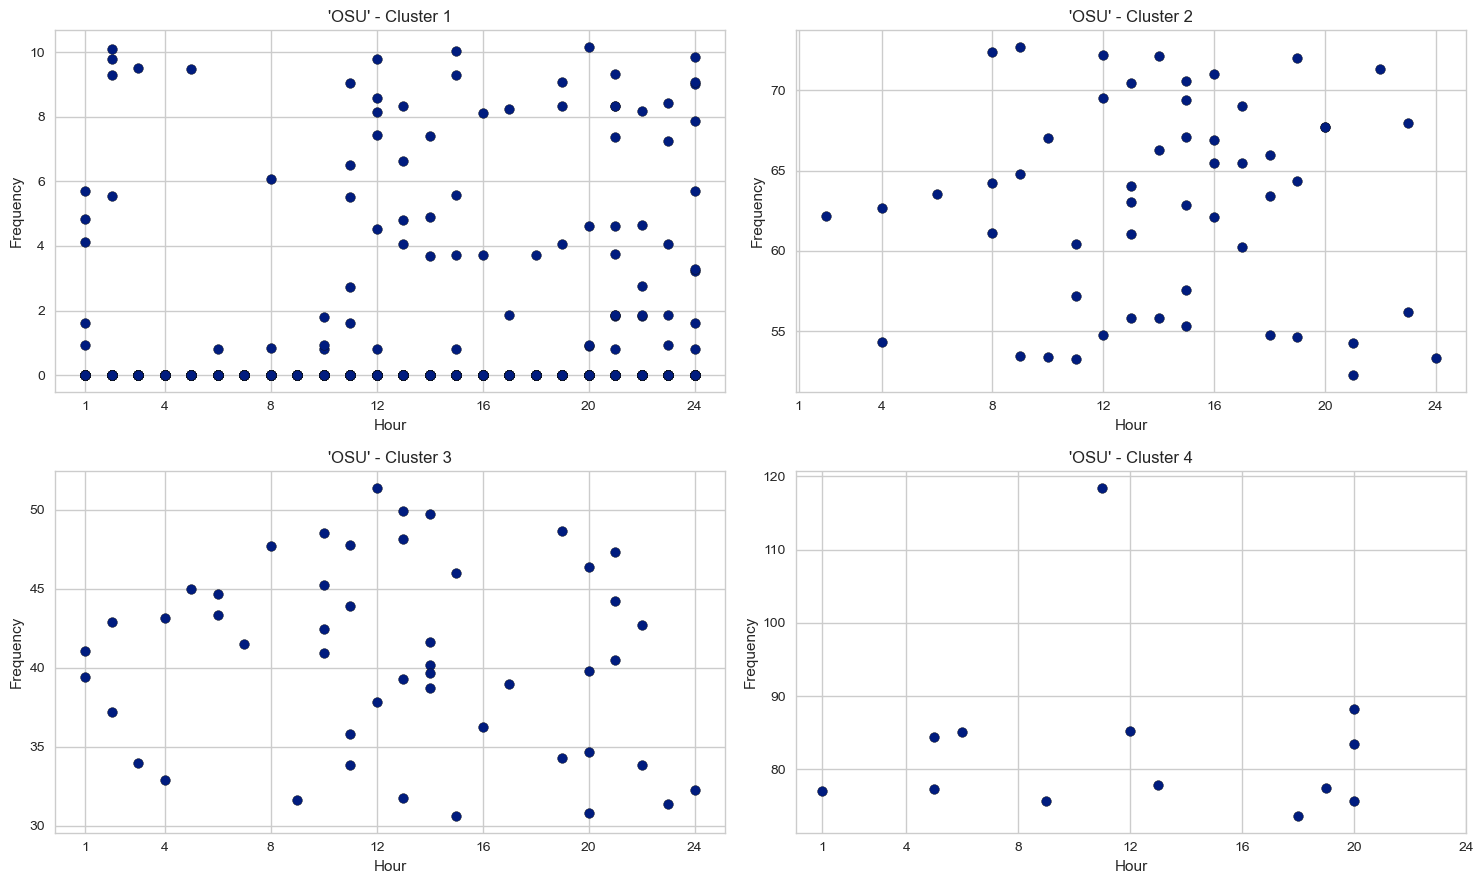

In [353]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,9),dpi=100)
for index, energy,rang,cluster_no in zip((osun_clus1.hour,osun_clus2.hour,osun_clus3.hour,osun_clus4.hour),(osun_clus1.energy,osun_clus2.energy,osun_clus3.energy,osun_clus4.energy),(221,222,223,224), (1,2,3,4)):
    ax=plt.subplot(rang)
    ax.scatter(x=index,y=energy, edgecolor="k")
    ax.set_xlabel("Hour")
    ax.set_ylabel("Frequency")
    ax.set_title("'OSU' - Cluster "+ str(cluster_no))
    plt.xticks(bins)
fig.tight_layout()
#plt.savefig('results/ondo_cluster.png')

In [381]:
osun_clus4_rgp = osun_clus4.groupby(by=['hour']).sum()

In [382]:
osun_clus3_rgp = osun_clus3.groupby(by=['hour']).sum()

In [383]:
osun_clus2_rgp = osun_clus2.groupby(by=['hour']).sum()

In [384]:
osun_clus1_rgp = osun_clus1.groupby(by=['hour']).sum()

In [393]:
osun_clus2.groupby(by=['day_name']).sum()

,energy,norm_energy,cluster,hour
day_name,,,,
Friday,617.598174,5.214497,20,170
Monday,626.726360,5.291568,20,124
Saturday,372.994876,3.149266,12,76
Sunday,765.803323,6.465821,24,174
Thursday,455.200490,3.843343,14,106
Tuesday,255.263400,2.155237,8,63
Wednesday,243.566111,2.056474,8,40


In [394]:
osun_clus3.groupby(by=['day_name']).sum()

,energy,norm_energy,cluster,hour
day_name,,,,
Friday,260.671364,2.200897,18,115
Monday,297.353982,2.510616,21,70
Saturday,367.862335,3.105931,27,87
Sunday,156.462928,1.321046,12,38
Thursday,447.974845,3.782336,33,159
Tuesday,148.983047,1.257892,12,66
Wednesday,310.354408,2.620381,24,88


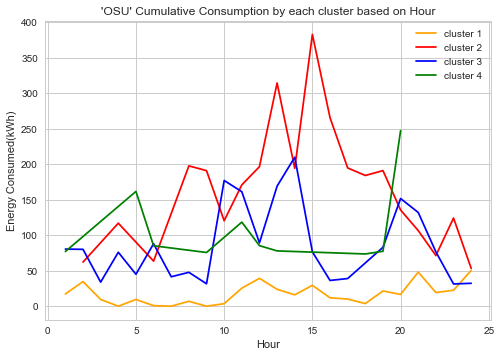

In [391]:
plt.plot(osun_clus1_rgp.index, osun_clus1_rgp.energy, c='orange', label="cluster 1")
plt.plot(osun_clus2_rgp.index, osun_clus2_rgp.energy, c='red', label="cluster 2")
plt.plot(osun_clus3_rgp.index, osun_clus3_rgp.energy, c='blue', label="cluster 3")
plt.plot(osun_clus4_rgp.index, osun_clus4_rgp.energy, c='green', label="cluster 4")
plt.xlabel("Hour")
plt.ylabel("Energy Consumed(kWh)")
plt.title("'OSU' Cumulative Consumption by each cluster based on Hour")
plt.legend()
plt.savefig('results/osun_cluste234.png', dpi=500)

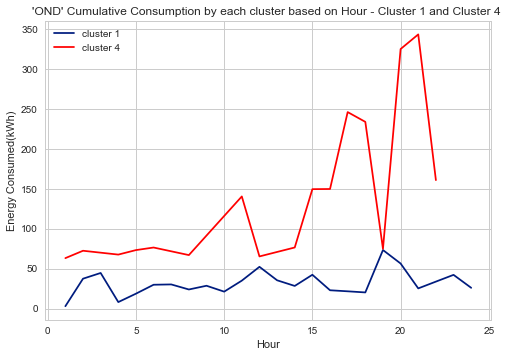

In [348]:
plt.plot(ondo_clus1_rgp.index, ondo_clus1_rgp.energy, label="cluster 1")
plt.plot(ondo_clus4_rgp.index, ondo_clus4_rgp.energy, c='red', label="cluster 4")
plt.xlabel("Hour")
plt.ylabel("Energy Consumed(kWh)")
plt.title("'OND' Cumulative Consumption by each cluster based on Hour - Cluster 1 and Cluster 4 ")
plt.legend()
plt.savefig('results/ondo_cluster14.png', dpi=500)

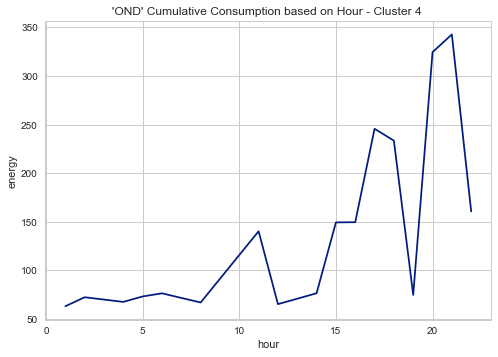

In [349]:
sns.lineplot(x=ondo_clus4_rgp.index, y = ondo_clus4_rgp.energy)
plt.title("'OND' Cumulative Consumption based on Hour - Cluster 4 ")
plt.savefig('results/ondo_cluster4.png', dpi=500)

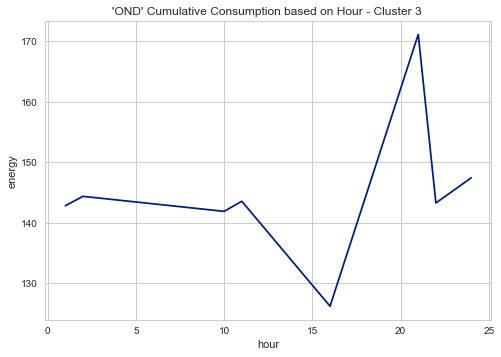

In [350]:
sns.lineplot(x=ondo_clus3_rgp.index, y = ondo_clus3_rgp.energy)
plt.title("'OND' Cumulative Consumption based on Hour - Cluster 3 ")
plt.savefig('results/ondo_cluster3.png', dpi=500)

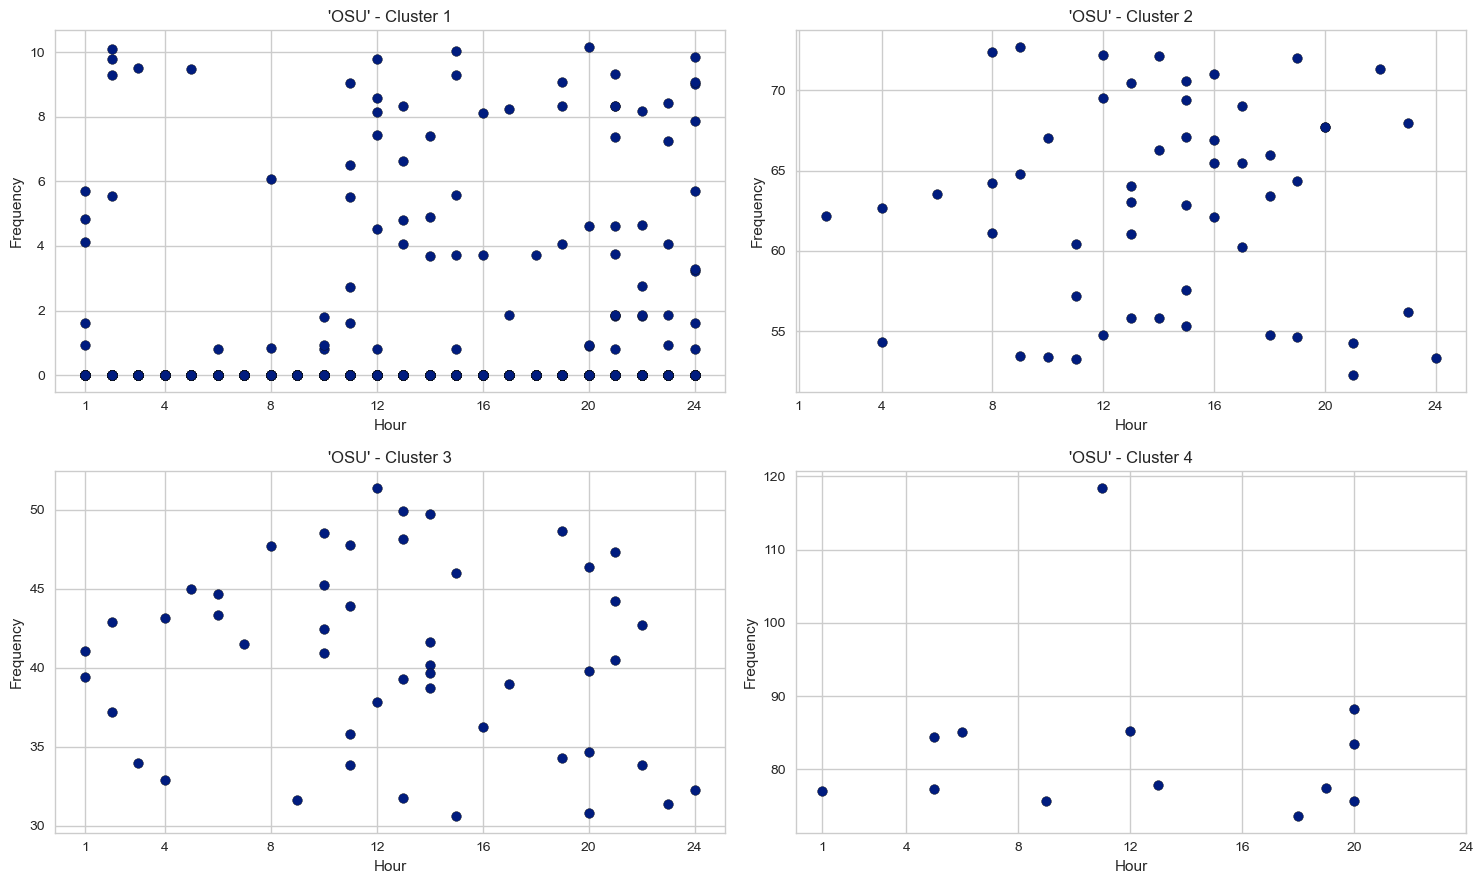

In [351]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,9),dpi=100)
bins= [1,4,8,12,16,20,24]
for index, energy,rang,cluster_no in zip((osun_clus1.hour,osun_clus2.hour,osun_clus3.hour,osun_clus4.hour),(osun_clus1.energy,osun_clus2.energy,osun_clus3.energy,osun_clus4.energy),(221,222,223,224), (1,2,3,4)):
    ax=plt.subplot(rang)
    ax.scatter(x=index,y=energy, edgecolor="k")
    ax.set_xlabel("Hour")
    ax.set_ylabel("Frequency")
    ax.set_title("'OSU' - Cluster "+ str(cluster_no))
    plt.xticks(bins)
fig.tight_layout()
#plt.savefig('results/ondo_cluster.png')